<a href="https://colab.research.google.com/github/Errouza/praktikumLaravel/blob/main/TubesDaming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing**

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, classification_report
from sklearn.tree import DecisionTreeClassifier

**READ DATA**

In [2]:
file_path = '/content/covid_19_indonesia_time_series_all.csv'

df_num = pd.read_csv(file_path)

df_num.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,75,...,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,192.31%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,75,...,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,182.93%,1.0,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,1,0,1,...,0.511648,0.16,0.16,0.0,0.00,0.00,0.00%,100.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,75,...,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,174.42%,1.0,1.0


In [3]:
print(df_num.columns)

Index(['Date', 'Location ISO Code', 'Location', 'New Cases', 'New Deaths',
       'New Recovered', 'New Active Cases', 'Total Cases', 'Total Deaths',
       'Total Recovered', 'Total Active Cases', 'Location Level',
       'City or Regency', 'Province', 'Country', 'Continent', 'Island',
       'Time Zone', 'Special Status', 'Total Regencies', 'Total Cities',
       'Total Districts', 'Total Urban Villages', 'Total Rural Villages',
       'Area (km2)', 'Population', 'Population Density', 'Longitude',
       'Latitude', 'New Cases per Million', 'Total Cases per Million',
       'New Deaths per Million', 'Total Deaths per Million',
       'Total Deaths per 100rb', 'Case Fatality Rate', 'Case Recovered Rate',
       'Growth Factor of New Cases', 'Growth Factor of New Deaths'],
      dtype='object')


In [4]:
df_num = df_num.dropna(subset=["New Cases", "Population", "Population Density", "Total Cases"])

In [5]:
df_num["Date"] = pd.to_datetime(df_num["Date"])

**Preprocessing**

data cleaning

In [7]:
columns_to_drop = [
    "City or Regency", "Special Status", "Total Regencies", "Total Cities",
    "Total Urban Villages", "Total Rural Villages", "Area (km2)"
]
cleaned_data = df_num.drop(columns=columns_to_drop)

cleaned_data['Province'] = cleaned_data['Province'].fillna('Unknown')
cleaned_data['Island'] = cleaned_data['Island'].fillna('Unknown')
cleaned_data['Time Zone'] = cleaned_data['Time Zone'].fillna('Unknown')

Data Tranformasi

In [8]:
cleaned_data['Date'] = pd.to_datetime(cleaned_data['Date'], format='%m/%d/%Y')

cleaned_data['Case Fatality Rate'] = (
    cleaned_data['Case Fatality Rate'].str.rstrip('%').astype(float) / 100
)
cleaned_data['Case Recovered Rate'] = (
    cleaned_data['Case Recovered Rate'].str.rstrip('%').astype(float) / 100
)

mengurangin data

In [9]:
columns_to_keep = [
    "Date", "Location", "Province", "New Cases", "New Deaths", "Total Cases",
    "Total Deaths", "Population", "Case Fatality Rate", "Case Recovered Rate"
]
reduced_data = cleaned_data[columns_to_keep]
reduced_data.head(), reduced_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31822 entries, 0 to 31821
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 31822 non-null  datetime64[ns]
 1   Location             31822 non-null  object        
 2   Province             31822 non-null  object        
 3   New Cases            31822 non-null  int64         
 4   New Deaths           31822 non-null  int64         
 5   Total Cases          31822 non-null  int64         
 6   Total Deaths         31822 non-null  int64         
 7   Population           31822 non-null  int64         
 8   Case Fatality Rate   31822 non-null  float64       
 9   Case Recovered Rate  31822 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(5), object(2)
memory usage: 2.4+ MB


(        Date     Location     Province  New Cases  New Deaths  Total Cases  \
 0 2020-03-01  DKI Jakarta  DKI Jakarta          2           0           39   
 1 2020-03-02  DKI Jakarta  DKI Jakarta          2           0           41   
 2 2020-03-02    Indonesia      Unknown          2           0            2   
 3 2020-03-02         Riau         Riau          1           0            1   
 4 2020-03-03  DKI Jakarta  DKI Jakarta          2           0           43   
 
    Total Deaths  Population  Case Fatality Rate  Case Recovered Rate  
 0            20    10846145              0.5128               1.9231  
 1            20    10846145              0.4878               1.8293  
 2             0   265185520              0.0000               0.0000  
 3             0     6074100              0.0000               1.0000  
 4            20    10846145              0.4651               1.7442  ,
 None)

**PREPARATION**

In [10]:
cleaned_data = reduced_data.drop_duplicates()
missing_values_summary = cleaned_data.isnull().sum()

Data transformation

In [12]:
scaler = MinMaxScaler()
numerical_columns = ["New Cases", "New Deaths", "Total Cases", "Total Deaths", "Population"]
cleaned_data[numerical_columns] = scaler.fit_transform(cleaned_data[numerical_columns])

cleaned_data["Case Fatality Rate"] = cleaned_data["Case Fatality Rate"].clip(0, 1)
cleaned_data["Case Recovered Rate"] = cleaned_data["Case Recovered Rate"].clip(0, 1)

Data validation

In [13]:
inconsistencies = cleaned_data[cleaned_data["Total Cases"] < cleaned_data["New Cases"]]

cleaned_data.head(), missing_values_summary, inconsistencies

(        Date     Location     Province  New Cases  New Deaths   Total Cases  \
 0 2020-03-01  DKI Jakarta  DKI Jakarta   0.000031         0.0  5.932825e-06   
 1 2020-03-02  DKI Jakarta  DKI Jakarta   0.000031         0.0  6.245079e-06   
 2 2020-03-02    Indonesia      Unknown   0.000031         0.0  1.561270e-07   
 3 2020-03-02         Riau         Riau   0.000015         0.0  0.000000e+00   
 4 2020-03-03  DKI Jakarta  DKI Jakarta   0.000031         0.0  6.557333e-06   
 
    Total Deaths  Population  Case Fatality Rate  Case Recovered Rate  
 0      0.000127    0.038549              0.5128                  1.0  
 1      0.000127    0.038549              0.4878                  1.0  
 2      0.000000    1.000000              0.0000                  0.0  
 3      0.000000    0.020510              0.0000                  1.0  
 4      0.000127    0.038549              0.4651                  1.0  ,
 Date                   0
 Location               0
 Province               0
 New Ca

**CLUSTERING**

In [14]:
clustering_data = df_num[["Population Density", "New Cases", "Total Cases"]]

In [15]:
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)

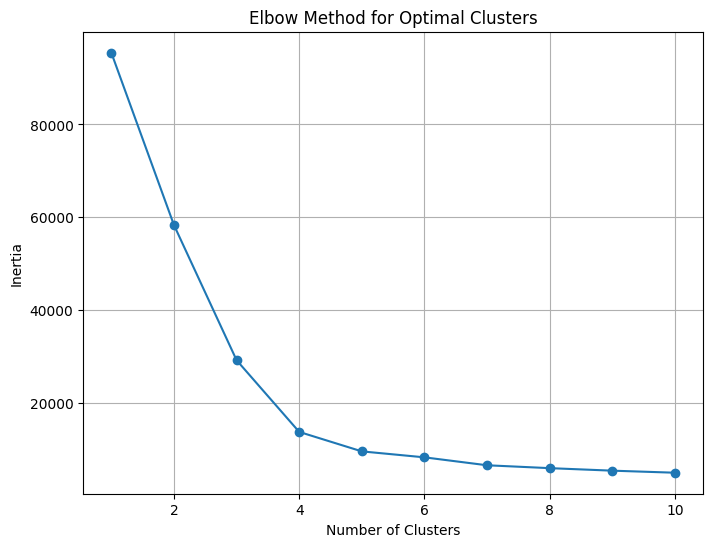

In [16]:
inertia = []
range_n_clusters = range(1, 11)
for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(clustering_data_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range_n_clusters, inertia, marker='o')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

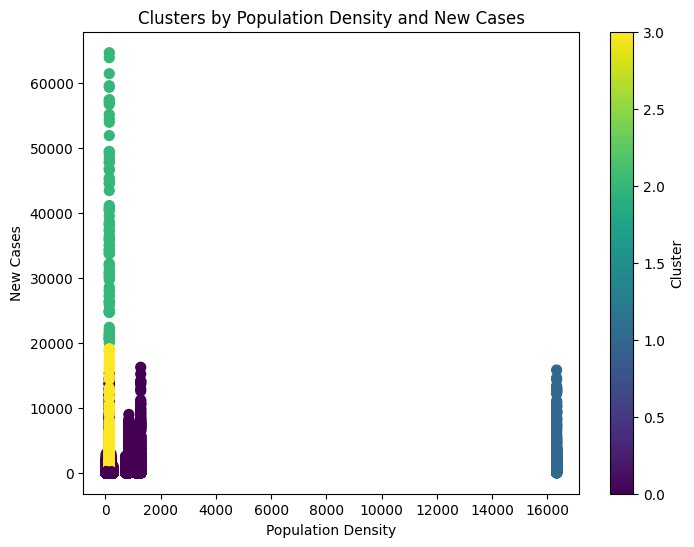

In [17]:
optimal_clusters = 4  # Adjust based on Elbow Curve
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df_num["Cluster"] = kmeans.fit_predict(clustering_data_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(df_num["Population Density"], df_num["New Cases"], c=df_num["Cluster"], cmap="viridis", s=50)
plt.title("Clusters by Population Density and New Cases")
plt.xlabel("Population Density")
plt.ylabel("New Cases")
plt.colorbar(label="Cluster")
plt.show()

**REGRESSION**

In [18]:
regression_data = df_num[["Date", "New Cases", "Total Cases"]]
regression_data["Days Since Start"] = (regression_data["Date"] - regression_data["Date"].min()).dt.days

X = regression_data[["Days Since Start"]]
y = regression_data["New Cases"]

<ipython-input-18-53d699def607>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regression_data["Days Since Start"] = (regression_data["Date"] - regression_data["Date"].min()).dt.days


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Linear regression

Mean Squared Error (Regression): 6758826.855964853


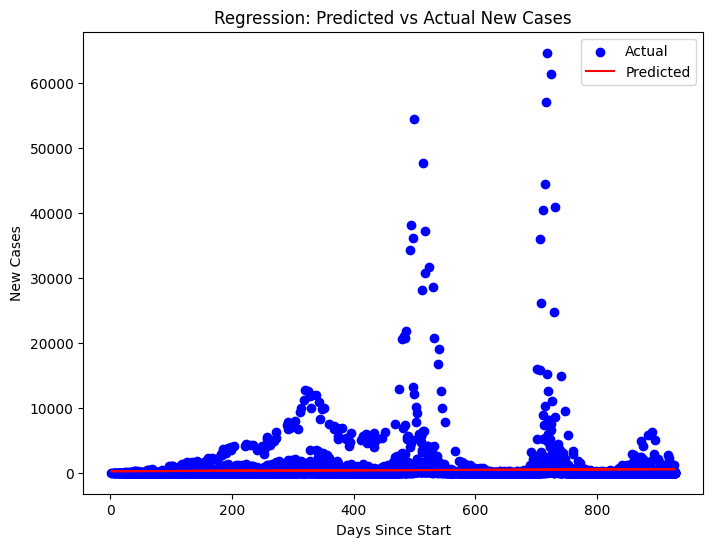

In [20]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (Regression): {mse}")

plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.title("Regression: Predicted vs Actual New Cases")
plt.xlabel("Days Since Start")
plt.ylabel("New Cases")
plt.legend()
plt.show()

**CLASSIFICATION**

In [21]:
def risk_level(row):
    if row["Total Cases"] > 10000:
        return "High"
    elif row["Total Cases"] > 1000:
        return "Medium"
    else:
        return "Low"

df_num["Risk Level"] = df_num.apply(risk_level, axis=1)

features = ["Population", "Population Density", "Total Cases", "Cluster"]
X_classification = df_num[features]
y_classification = LabelEncoder().fit_transform(df_num["Risk Level"])

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4276
           1       1.00      1.00      1.00       896
           2       1.00      1.00      1.00      1193

    accuracy                           1.00      6365
   macro avg       1.00      1.00      1.00      6365
weighted avg       1.00      1.00      1.00      6365



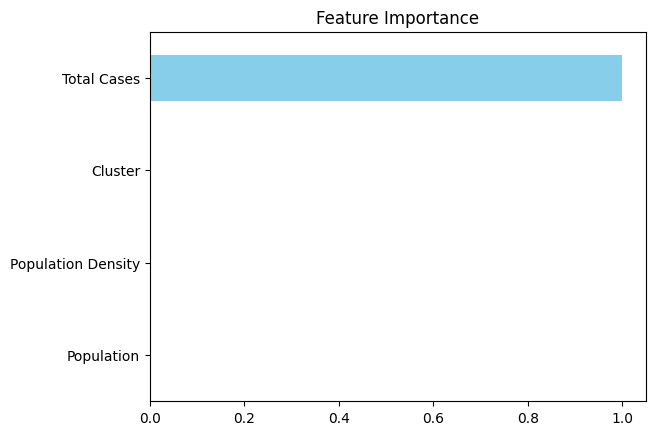

In [23]:
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

feature_importance = pd.Series(classifier.feature_importances_, index=features)
feature_importance.sort_values().plot(kind="barh", title="Feature Importance", color="skyblue")
plt.show()